WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 16 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
F:\ProbHomeworks\pythonProject\.venv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


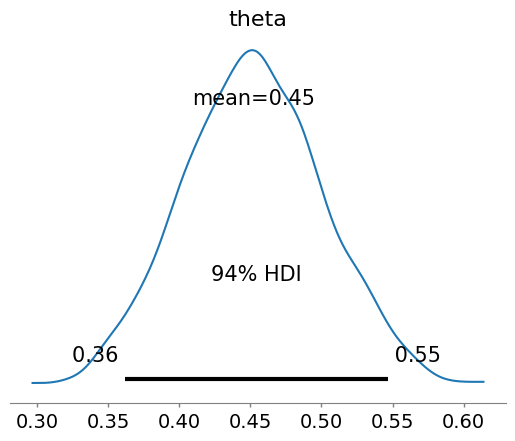

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate some coin tosses
# Assume we have observed 100 coin tosses, with 50 heads (successes)
observed_data = np.random.binomial(n=1, p=0.5, size=100)

# Step 2: Define the probabilistic model
with pm.Model() as coin_toss_model:
    # Define a prior for the probability of heads (theta)
    theta = pm.Beta('theta', alpha=1, beta=1)  # Uniform prior between 0 and 1

    # Likelihood of the observed data, using the Binomial distribution
    y = pm.Bernoulli('y', p=theta, observed=observed_data)

    # Step 3: Perform MCMC sampling to get the posterior distribution
    trace = pm.sample(2000, return_inferencedata=False, chains=2)

# Step 4: Visualize the posterior distribution
pm.plot_posterior(trace, var_names=['theta'])
plt.show()


F:\ProbHomeworks\pythonProject\.venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [probabilities]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 73 seconds.


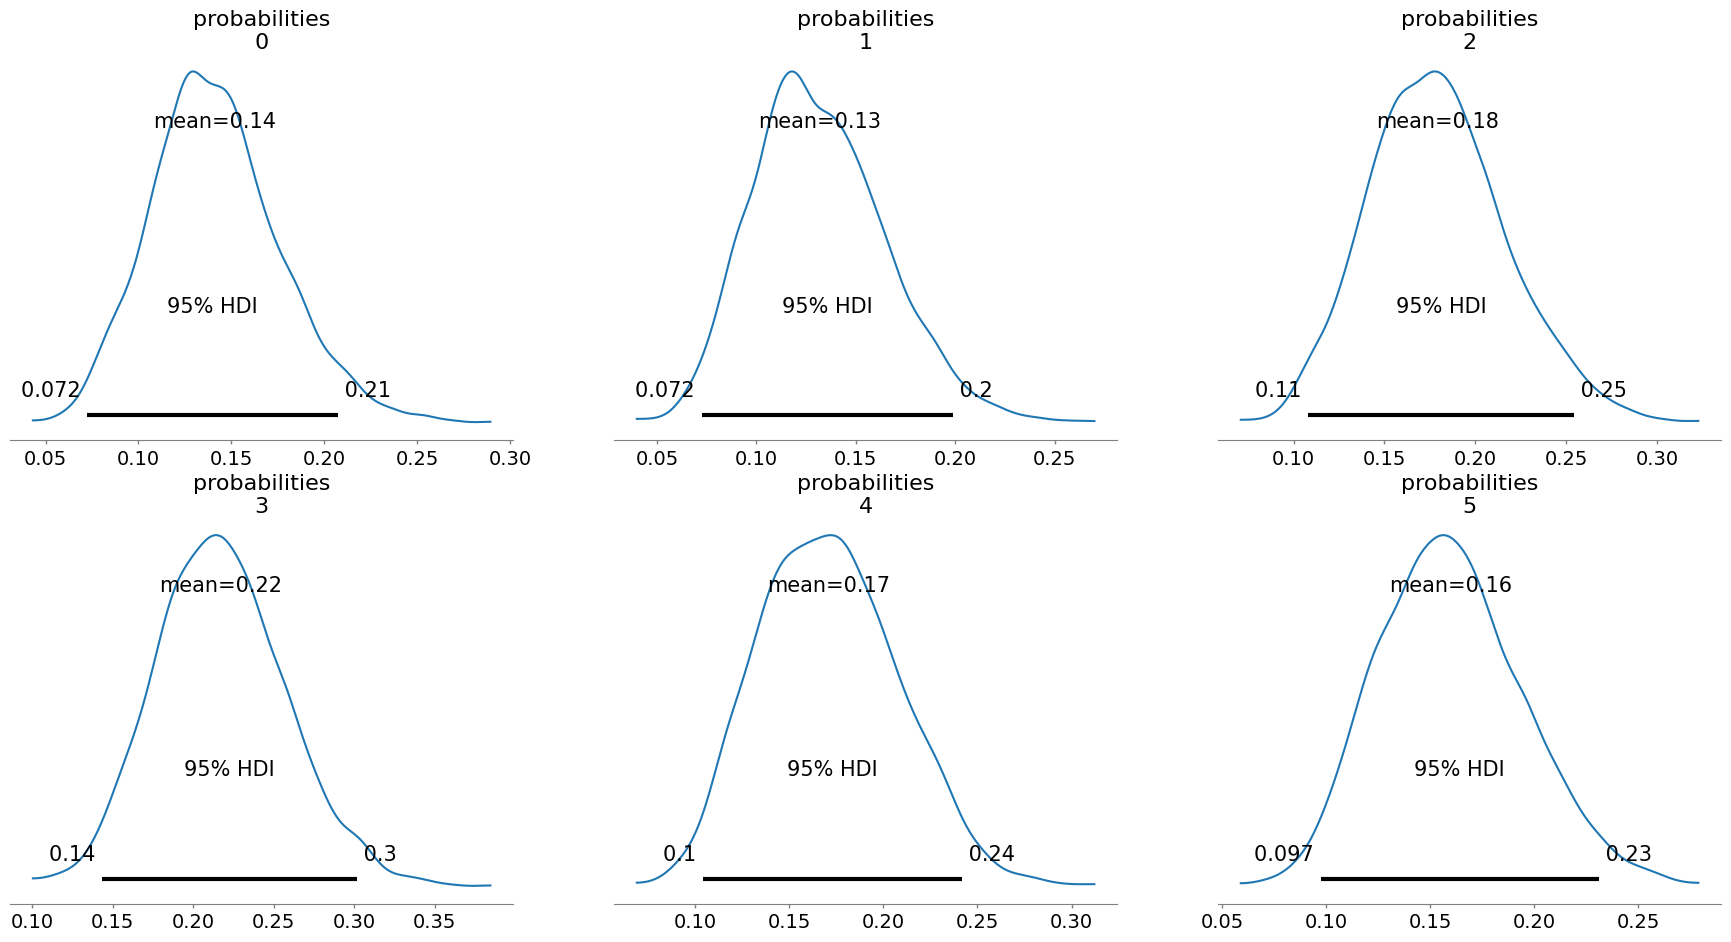

                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
probabilities[0]  0.141  0.035   0.078    0.208      0.001      0.0    4025.0   
probabilities[1]  0.132  0.033   0.072    0.193      0.001      0.0    4215.0   
probabilities[2]  0.179  0.038   0.108    0.249      0.001      0.0    4045.0   
probabilities[3]  0.217  0.040   0.142    0.293      0.001      0.0    4758.0   
probabilities[4]  0.171  0.037   0.105    0.237      0.001      0.0    4203.0   
probabilities[5]  0.160  0.035   0.095    0.223      0.001      0.0    3984.0   

                  ess_tail  r_hat  
probabilities[0]    2387.0    1.0  
probabilities[1]    2789.0    1.0  
probabilities[2]    2864.0    1.0  
probabilities[3]    2626.0    1.0  
probabilities[4]    2957.0    1.0  
probabilities[5]    2686.0    1.0  


In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Step 1: Simulate some dice rolls (observed data)
# Assume we roll the die 100 times with a fair probability (1/6) for each face
observed_data = np.random.choice([1, 2, 3, 4, 5, 6], size=100)

# Step 2: Define the probabilistic model for a fair die
with pm.Model() as dice_roll_model:
    # Define the prior for the probabilities of each die face (1/6 for each)
    probabilities = pm.Dirichlet('probabilities', a=np.ones(6))
    
    # Likelihood of observing each roll based on the die's categorical distribution
    outcome = pm.Categorical('outcome', p=probabilities, observed=observed_data - 1)  # -1 because Categorical takes 0-indexed

    # Step 3: Perform MCMC sampling to get the posterior distribution
    trace = pm.sample(2000, return_inferencedata=True, chains=2)

# Step 4: Visualize the posterior distribution of probabilities for each die face
pm.plot_posterior(trace, var_names=['probabilities'], hdi_prob=0.95)
plt.show()

# Step 5: Summarize the trace to collect statistics
summary = az.summary(trace, var_names=["probabilities"])
print(summary)


The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>NUTS: [p]
>BinaryGibbsMetropolis: [toss_1, toss_2]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
F:\ProbHomeworks\pythonProject\.venv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


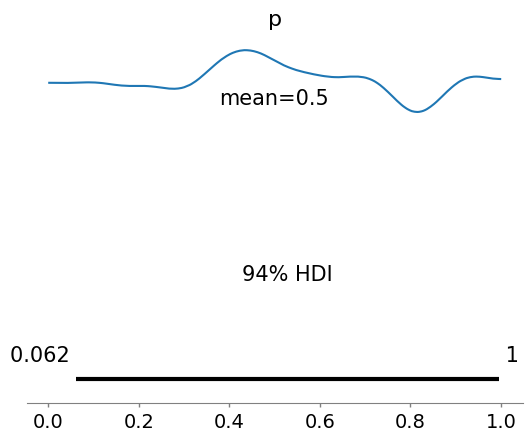

Posterior probability that both tosses give the same result: 0.66


In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the probabilistic model for two coin tosses
with pm.Model() as coin_toss_model:
    # Prior: Probability of heads for the coin (uniform between 0 and 1)
    p = pm.Beta('p', alpha=1, beta=1)  # Beta prior, equivalent to uniform

    # Two independent coin tosses, modeled as Bernoulli trials
    toss_1 = pm.Bernoulli('toss_1', p=p)
    toss_2 = pm.Bernoulli('toss_2', p=p)

    # Step 2: Define a condition for both tosses having the same result
    # This condition will be satisfied if both tosses are either 0 (tails) or 1 (heads)
    same_result = pm.Deterministic('same_result', pm.math.eq(toss_1, toss_2))

    # Step 3: Perform MCMC sampling to estimate the posterior distribution
    trace = pm.sample(2000, return_inferencedata=False, chains=2)

# Step 4: Analyze and visualize the results
# Plot the posterior distribution of the probability of heads (p)
pm.plot_posterior(trace, var_names=['p'])
plt.show()

# Step 5: Analyze the posterior for the 'same_result' variable
# Posterior distribution of the probability that both tosses give the same result
same_result_trace = trace['same_result']
same_result_prob = np.mean(same_result_trace)  # Mean probability that both tosses are the same

print(f"Posterior probability that both tosses give the same result: {same_result_prob:.2f}")
